IMAGE CLASSIFIER

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matpolib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU') #limiting the memory for example if you had multiple cpu's

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True) #looping all potential gpu's,keep absolute you gonna need

In [ ]:
import cv2#computer vvision#remove which cannot be opened with python
import imghdr
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive#accesing google drive by this notebook
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/data#accessing my file path on my google drive

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/data#accessing my file path on my google drive'
/content/drive/My Drive/Colab Notebooks/data


In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/data'  # Replace with your folder path


In [ ]:
os.listdir(os.path.join(data_dir,'HAPPY'))#i am trying to compare load data in data directory happy folder

['image_144.jpg',
 'image_15.jpg',
 'image_178.jpg',
 'image_193.jpg',
 'image_187.jpg',
 'image_33.jpeg',
 'image_150.jpg',
 'image_218.jpg',
 'image_219.jpg',
 'image_230.jpg',
 'image_16.jpg',
 'image_29.jpeg',
 'image_52.jpeg',
 'image_153.jpg',
 'image_147.jpg',
 'image_225.jpg',
 'image_231.jpg',
 'image_224.jpg',
 'device_default_thumbnail2.png',
 'image_190.jpg',
 'image_192.jpg',
 'image_232.jpg',
 'image_151.jpg',
 'image_14.jpg',
 'image_145.jpg',
 'image_227.jpg',
 'image_233.jpg',
 'image_179.jpg',
 'image_184.jpg',
 'image_48.jpeg',
 'image_226.jpg',
 'image_186.jpg',
 'image_28.jpeg',
 'image_180.jpg',
 'image_234.jpg',
 'image_156.jpg',
 'image_12.jpeg',
 'image_195.jpg',
 'image_44.jpeg',
 'image_146.jpg',
 'image_152.jpg',
 'image_17.jpg',
 'image_13.jpg',
 'image_185.jpg',
 'image_191.jpg',
 'image_142.jpg',
 'image_89.jpg',
 'image_62.jpg',
 'image_140.jpg',
 'image_24.jpeg',
 'image_237.jpg',
 'image_223.jpg',
 'image_141.jpg',
 'image_168.jpg',
 'image_169.jpg',
 

In [ ]:
os.listdir(os.path.join(data_dir,'SAD'))#images on sad folder

['image_76.jpg',
 'image_133.jpg',
 'image_52.jpeg',
 'image_29.jpeg',
 'image_48.jpeg',
 'image_14.jpg',
 'image_25.jpeg',
 'image_15.jpg',
 'image_6.jpeg',
 'image_16.jpg',
 'image_33.jpeg',
 'device_default_thumbnail2.png',
 'image_66.jpg',
 'image_123.jpg',
 'image_72.jpg',
 'image_38.jpeg',
 'image_57.png',
 'image_43.png',
 'image_40.jpeg',
 'image_94.jpg',
 'image_112.jpg',
 'image_99.jpg',
 'image_67.jpg',
 'image_136.jpg',
 'image_71.jpg',
 'image_122.jpg',
 'image_65.jpg',
 'image_120.jpg',
 'image_55.jpeg',
 'image_108.jpg',
 'image_134.jpg',
 'image_98.jpg',
 'image_73.jpg',
 'image_59.jpeg',
 'image_70.jpg',
 'image_119.jpg',
 'image_74.jpg',
 'image_60.png',
 'image_58.jpeg',
 'image_121.jpg',
 'image_125.jpg',
 'image_109.jpg',
 'image_131.jpg',
 'image_64.jpg',
 'image_135.jpg',
 'image_75.jpg',
 'image_124.jpg',
 'image_61.jpg',
 'image_35.jpeg',
 'image_88.jpg',
 'image_126.jpg',
 'image_63.jpg',
 'image_42.jpeg',
 'image_132.jpg',
 'image_77.jpg',
 'image_130.jpg',
 

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
image_exts[3]

'png'

In [ ]:
# Loop through each image class in the main directory
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Loop through each image in the class directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)

            try:
                # Read the image using OpenCV
                img = cv2.imread(image_path)

                # Check if it's a valid image format
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in the extension list: {}'.format(image_path))
                    # If not a valid image format, you can remove it here
                    # os.remove(image_path)
            except Exception as e:
                print('Issue with image: {}'.format(image_path))

In [ ]:
#load data

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 445 files belonging to 2 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

In [ ]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]#either 1 or 0 will represent happy or sad

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int32)

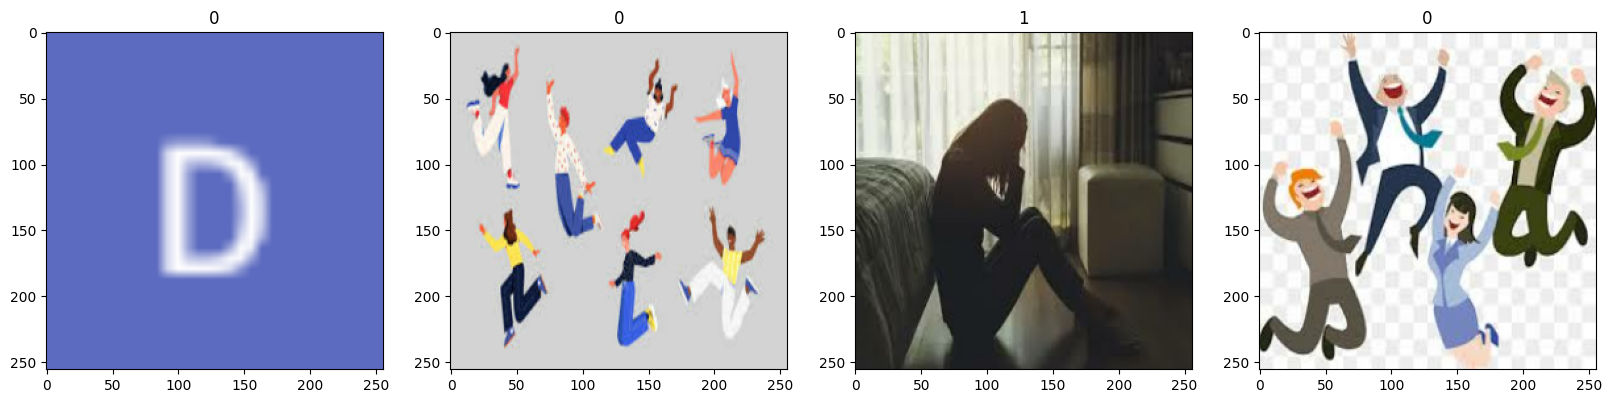

In [ ]:
#is gonna show wthich type is 0 or which one is 1
#class 0 is happy 1 sad people
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[1].shape

(32,)

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0].max()

255.0

In [ ]:
batch

(array([[[[ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          ...,
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ]],
 
         [[ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          ...,
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ]],
 
         [[ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          ...,
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ],
          [ 92.       , 107.       , 192.       ]],
 
         ...,
 
         [[ 

In [ ]:
scaled = batch[0]/255

In [ ]:
scaled #Scaling is like making sure all the ingredients in a recipe are in the right proportion. In data science, it means adjusting the values of different features in a dataset so that they are on a similar scale.

array([[[[0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         ...,
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ]],

        [[0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         ...,
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ]],

        [[0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         ...,
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ]],

        ...,

        [[0.36078432, 0.41960785, 0.7529412 ],
         [0.36078432, 0.41960785, 0.7529412 ]

In [ ]:
scaled.max()

1.0

In [ ]:
scaled.min()

In [ ]:
data = data.map(lambda x,y:(x/255,y)) #x labels

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.00324491, 0.00324491, 0.00342945],
          [0.00324623, 0.00324623, 0.00343077],
          [0.00325223, 0.00325223, 0.00343678],
          ...,
          [0.0030296 , 0.00313725, 0.00326028],
          [0.0030296 , 0.00313725, 0.00326028],
          [0.0030296 , 0.00313725, 0.00326028]],
 
         [[0.00324491, 0.00324755, 0.00343209],
          [0.003246  , 0.00324887, 0.0034333 ],
          [0.00325097, 0.00325488, 0.00343879],
          ...,
          [0.0030296 , 0.00313725, 0.00326028],
          [0.0030296 , 0.00313725, 0.00326028],
          [0.0030296 , 0.00313725, 0.00326028]],
 
         [[0.00324491, 0.00325956, 0.00344411],
          [0.00324497, 0.00326089, 0.0034448 ],
          [0.00324525, 0.00326689, 0.00344794],
          ...,
          [0.0030296 , 0.00313725, 0.00326028],
          [0.0030296 , 0.00313725, 0.00326028],
          [0.0030296 , 0.00313725, 0.00326028]],
 
         ...,
 
         [[0.00298347, 0.00321415, 0.0033218 ],
          [0.00298

In [149]:
#data splitting training/testing
len(data)

14

In [151]:
train_size = int(len(data)*.7)#training
val_size = int(len(data)*.2)#validation
test_size = int(len(data)*1)#testing

In [153]:
train_size

9

In [154]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size*val_size).take(test_size)

In [157]:
len(val)

2

In [159]:
#build deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

model=Sequential()

In [161]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [163]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#Train

In [ ]:
logdir='logs'

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(output_dim, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have defined 'train' and 'val' datasets and 'tensorboard_callback'
# Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


NameError: ignored

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


In [ ]:
fig=plt.figure()
plt.plot(hist.history['val_loss'],color='orange',label='val_losss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

EVALUATION

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
import cv2

In [ ]:
img = cv2.imread(HAPPY_SAMPLE.jpg)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
if yhat>0.5:
  print(f'predicted class is sad')
else:
  print(f'predicted class is happy')

save the model

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassfiernewversionlive.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

In [ ]:
if yhatnew > 0.5:
  print(f'predicted class is sad')
else:
  print(f'predicted class is happy')